# Loan Prediction using Decision Tree Classification

### 1. Import required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

def snjy():
    print("SANJAY R - 24BAD407")

### 2. Load the Loan Prediction dataset

In [2]:
snjy()
file_path = '/kaggle/input/datasets/ninzaami/loan-predication/train_u6lujuX_CVtuZ9i (1).csv'
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
df.head()

SANJAY R - 24BAD407
Dataset Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 3. Perform Preprocessing
#### Handle missing values & Encode categorical variables

In [3]:
snjy()
# Check for missing values
print("Missing values before preprocessing:\n", df.isnull().sum())

# Handling missing values
# Categorical columns: fill with mode
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Numerical columns: fill with median
num_cols = ['LoanAmount']
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

print("\nMissing values after preprocessing:\n", df.isnull().sum())

# Encode categorical variables
le = LabelEncoder()
categorical_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_to_encode:
    df[col] = le.fit_transform(df[col])

# Drop Loan_ID as it's not a predictor
df.drop('Loan_ID', axis=1, inplace=True)

df.head()

SANJAY R - 24BAD407
Missing values before preprocessing:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after preprocessing:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### 4. Split dataset into training and testing sets

In [4]:
snjy()
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

SANJAY R - 24BAD407
Training set size: (491, 11)
Testing set size: (123, 11)


### 5. Train a Decision Tree classifier

In [5]:
snjy()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
print("Model Trained Successfully.")

SANJAY R - 24BAD407
Model Trained Successfully.


### 6. Experiment with tree depth / pruning

In [6]:
snjy()
#Shallow Tree
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)
y_pred_shallow = shallow_tree.predict(X_test)

# Deep Tree (Default)
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
deep_tree.fit(X_train, y_train)
y_pred_deep = deep_tree.predict(X_test)

print("Shallow Tree Accuracy:", accuracy_score(y_test, y_pred_shallow))
print("Deep Tree Accuracy:", accuracy_score(y_test, y_pred_deep))

SANJAY R - 24BAD407
Shallow Tree Accuracy: 0.7642276422764228
Deep Tree Accuracy: 0.6910569105691057


### 7. Predict loan status

In [7]:
snjy()
# Example prediction
sample_data = X_test.iloc[0:5]
predictions = shallow_tree.predict(sample_data)
print("Predictions for first 5 test samples:", predictions)
print("Actual labels:", y_test.iloc[0:5].values)

SANJAY R - 24BAD407
Predictions for first 5 test samples: [1 1 1 1 1]
Actual labels: [1 1 1 1 1]


### 8. Evaluate performance

In [8]:
snjy()
def evaluate_model(y_true, y_pred, tree_type):
    print(f"--- {tree_type} Evaluation ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_shallow, "Shallow Tree (max_depth=3)")
evaluate_model(y_test, y_pred_deep, "Deep Tree (Unpruned)")

SANJAY R - 24BAD407
--- Shallow Tree (max_depth=3) Evaluation ---
Accuracy : 0.7642276422764228
Precision: 0.7524752475247525
Recall   : 0.95
F1-Score : 0.8397790055248618


--- Deep Tree (Unpruned) Evaluation ---
Accuracy : 0.6910569105691057
Precision: 0.7560975609756098
Recall   : 0.775
F1-Score : 0.7654320987654321




### 9. Analyze feature importance

In [9]:
snjy()
importances = shallow_tree.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

SANJAY R - 24BAD407
Feature Importances:
              Feature  Importance
9      Credit_History    0.864621
6   CoapplicantIncome    0.061411
8    Loan_Amount_Term    0.042869
1             Married    0.014193
2          Dependents    0.008516
5     ApplicantIncome    0.008391
0              Gender    0.000000
3           Education    0.000000
4       Self_Employed    0.000000
7          LoanAmount    0.000000
10      Property_Area    0.000000


### 10. Detect overfitting behavior

In [10]:
snjy()
train_acc_deep = accuracy_score(y_train, deep_tree.predict(X_train))
test_acc_deep = accuracy_score(y_test, deep_tree.predict(X_test))

train_acc_shallow = accuracy_score(y_train, shallow_tree.predict(X_train))
test_acc_shallow = accuracy_score(y_test, shallow_tree.predict(X_test))

print(f"Deep Tree - Train Accuracy: {train_acc_deep:.4f}, Test Accuracy: {test_acc_deep:.4f}")
print(f"Shallow Tree - Train Accuracy: {train_acc_shallow:.4f}, Test Accuracy: {test_acc_shallow:.4f}")

if train_acc_deep - test_acc_deep > 0.1:
    print("\nSignificant overfitting detected in Deep Tree (Training accuracy is much higher than test accuracy).")

SANJAY R - 24BAD407
Deep Tree - Train Accuracy: 1.0000, Test Accuracy: 0.6911
Shallow Tree - Train Accuracy: 0.8269, Test Accuracy: 0.7642

Significant overfitting detected in Deep Tree (Training accuracy is much higher than test accuracy).


### 11. Compare shallow vs deep trees
Summary: Shallow trees are easier to interpret and less prone to overfitting, while deep trees can capture complex patterns but often overfit noise in the training data.

### Visualization

SANJAY R - 24BAD407


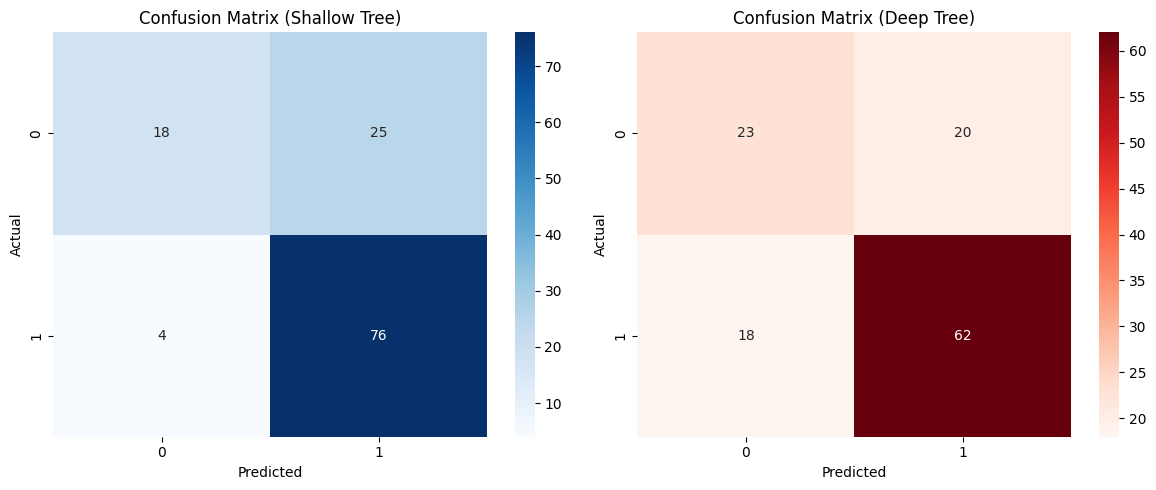

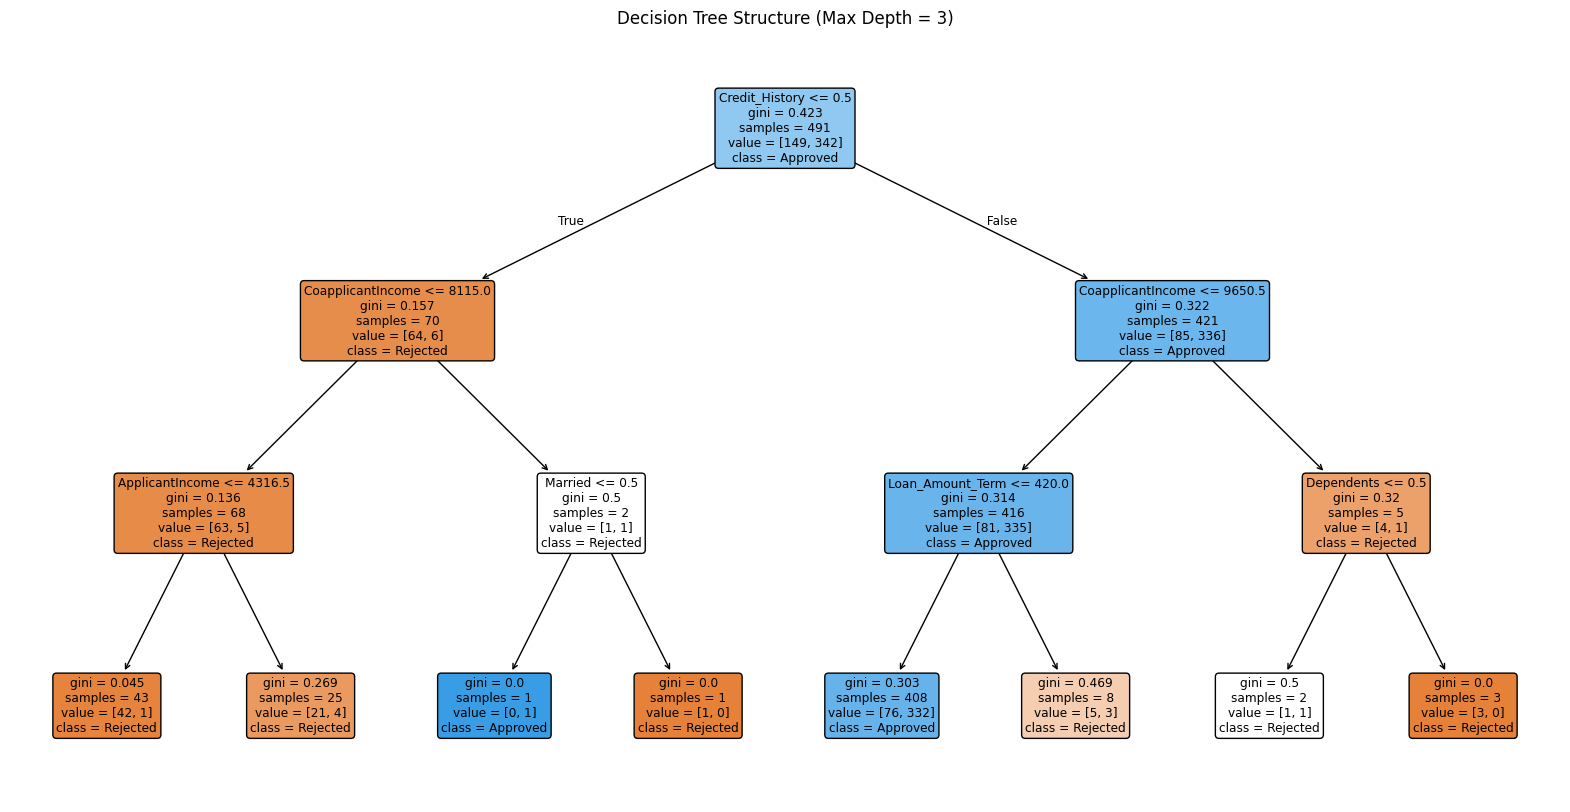

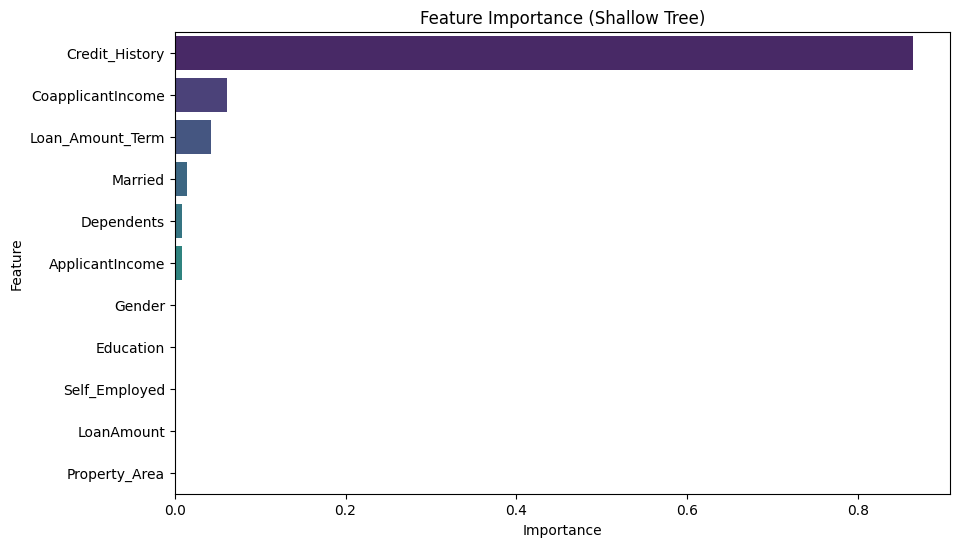

In [11]:
snjy()
# Confusion Matrix Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_shallow), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Shallow Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_deep), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Deep Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Tree Structure Plot
plt.figure(figsize=(20, 10))
plot_tree(shallow_tree, feature_names=X.columns.tolist(), class_names=['Rejected', 'Approved'], filled=True, rounded=True)
plt.title("Decision Tree Structure (Max Depth = 3)")
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Shallow Tree)')
plt.show()